Загрузите датасет `digits` с помощью функции `load_digits` из `sklearn.datasets` и подготовьте матрицу признаков `X` и ответы на обучающей выборке `y` (вам потребуются поля `data` и `target` в объекте, который возвращает `load_digits`).

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x_digits_img, y_answers  = datasets.load_digits(return_X_y=True)

In [3]:
np.shape(x), np.shape(y)

NameError: name 'x' is not defined

In [ ]:
plt.gray()
plt.matshow(data.images[13])

## Задание 1\.

Для оценки качества далее нужно будет использовать `cross_val_score` из `sklearn.cross_validation` с параметром `cv=10`. Эта функция реализует k-fold cross validation c `k` равным значению параметра `cv`. Мы предлагаем использовать `k=10`, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и `k=5`. Функция `cross_val_score` будет возвращать `numpy.ndarray`, в котором будет `k` чисел - качество в каждом из `k` экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод `.mean()` у массива, который возвращает `cross_val_score`.

С небольшой вероятностью вы можете натолкнуться на случай, когда полученное вами качество в каком-то из пунктов не попадет в диапазон, заданный для правильных ответов - в этом случае попробуйте перезапустить ячейку с `cross_val_score` несколько раз и выбрать наиболее «типичное» значение. Если это не помогает, то где-то была допущена ошибка.

Если вам захочется ускорить вычисление `cross_val_score` - можете попробовать использовать параметр `n_jobs`, но будьте осторожны: в одной из старых версий sklearn была ошибка, которая приводила к неверному результату работы `cross_val_score` при задании `n_jobs` отличным от `1`. Сейчас такой проблемы возникнуть не должно, но проверить, что все в порядке, не будет лишним.

Создайте `DecisionTreeClassifier` с настройками по умолчанию и измерьте качество его работы с помощью `cross_val_score`. Эта величина и будет ответом в пункте `1`.

In [23]:
def cross_valid(clf):
    cross_valid = model_selection.cross_val_score(estimator=clf,
                                              X = x_digits_img,
                                              y = y_answers,
                                              cv = 10,
                                              n_jobs=-1)
    print(cross_valid.mean())
    return cross_valid.mean()

In [7]:
des_tree = cross_valid(tree.DecisionTreeClassifier())

0.8285909373060211


## Задание 2\. 

Воспользуйтесь `BaggingClassifier` из `sklearn.ensemble`, чтобы обучить бэггинг над `DecisionTreeClassifier`. Используйте в `BaggingClassifier` параметры по умолчанию, задав только количество деревьев равным `100`.

Качество классификации новой модели – ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [8]:
bagging = cross_valid(BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(),
                                        n_estimators=100))

0.9253817504655494


In [9]:
ensemble.BaggingClassifier?

Object `ensemble.BaggingClassifier` not found.


## Задание 3\. 
Теперь изучите параметры `BaggingClassifier` и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех $d$ признаках, а на $\sqrt d$ случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. 

Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [10]:
bagging_better = cross_valid(BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(),
                                        n_estimators=100,
                                        max_features=math.sqrt(x_digits_img.shape[1])/x_digits_img.shape[1]))

0.9298882681564244


## Задание 4\. 
Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в `BaggingClassifier` и добавить его в `DecisionTreeClassifier`. Какой параметр за это отвечает, можно понять из документации `sklearn`, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же $\sqrt d$ признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [11]:
bagging_better = cross_valid(
    BaggingClassifier(
        base_estimator=tree.DecisionTreeClassifier(
            max_features=math.sqrt(x_digits_img.shape[1])/x_digits_img.shape[1]),
        random_state=10,
        n_estimators=100))

0.9432278088144009


## Задание 5\. 

Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с `RandomForestClassifier` из `sklearn.ensemble`. 

Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

In [32]:
rand_forest_res = []
n_estim = [n for n in range(1, 100, 5)]
depth = [n for n in range(1, 20)]
for n in depth:
    rand_forest_res.append(cross_valid(RandomForestClassifier(n_estimators=25,
                                                              n_jobs=-1,
                                                              max_depth=n,
                                                              random_state=10)))

0.6193916821849782
0.7484543761638733
0.8030012414649287
0.8547517070142767
0.8797920546244569
0.9170856610800744
0.9193171942892613
0.9248603351955307
0.9421166977032899
0.9343296089385476
0.9415611421477342
0.9454438237119802
0.9421166977032899
0.9443389199255119
0.9465673494723772
0.9443420235878335
0.9443389199255121
0.9460148975791434
0.9460148975791434


Text(0, 0.5, 'Качество классификации')

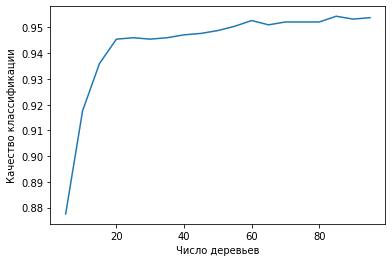

In [27]:
plt.plot(n_estim, rand_forest_res)
plt.xlabel('Число деревьев')
plt.ylabel('Качество классификации')

Text(0, 0.5, 'Качество классификации')

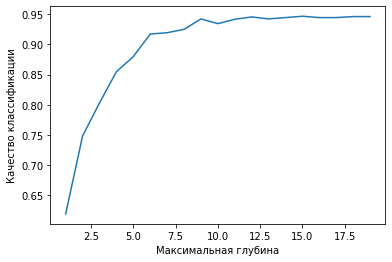

In [33]:
plt.plot(depth, rand_forest_res)
plt.xlabel('Максимальная глубина')
plt.ylabel('Качество классификации')

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

1. Случайный лес сильно переобучается с ростом количества деревьев
2. При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев
3. С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.
4. При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.
5. При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.
6. При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.
7. При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг друга).

In [34]:
[2, 3, 4, 7]

[2, 3, 4, 7]